In [1]:
import cv2 
import matplotlib.pyplot as plt
from pandas import *

In [2]:
data = read_csv("names.csv")
imgList = data['Filenames'].tolist()
l = len(imgList)
print(imgList)
print(l)

['chhota1.jpg', 'chhota2.jpg', 'ajanta1.jpg', 'ajanta2.jpg', 'chahar5.jpg', 'chahar6.jpg', 'fateh4.jpg', 'fateh5.jpg', 'gate3.jpg', 'gate9.jpg', 'humayun5.jpg', 'humayun9.jpg', 'humayun7.jpg', 'humayun8.jpg', 'indiagate6.jpg', 'indiagate7.jpg', 'basilica1.jpg', 'basilica2.jpg', 'basilica3.jpg', 'basilica4.jpg', 'basilica4.jpg', 'basilica5.jpg', 'charminar1.jpg', 'charminar2.jpg', 'charminar3.jpg', 'charminar4.jpg', 'golden1.jpg', 'golden2.jpg', 'golden3.jpg', 'golden4.jpg', 'hawamahal1.jpeg', 'hawamahal2.jpeg', 'iron3.jpg', 'iron4.jpg', 'jamali1.jpg', 'jamali2.jpg', 'lotus1.jpg', 'lotus3.jpg', 'mysore1.jpg', 'mysore2.jpg', 'qutub3.jpg', 'qutub2.jpeg', 'taj1.jpeg', 'taj3.jpg', 'victoria1.jpg', 'victoria2.jpg', 'golden5.jpeg']
47


In [3]:
grayscaleImages = []
for imageName in imgList:
    imagePath = "./images/" + str(imageName)
    grayscaleImages.append(cv2.imread(imagePath,0))

In [4]:
sift = cv2.SIFT_create()
def getSIFT(image):
    return sift.detectAndCompute(image, None)

In [5]:
import pickle
keypoints = []
descriptors = []
def generateKeypointsDescriptors():
    for i,image in enumerate(grayscaleImages):
        k, d = getSIFT(image)
        keypoints.append(k)
        descriptors.append(d)
    for i,keypoint in enumerate(keypoints):
        keys = []
        filepath = "./keypoints/" + str(imgList[i].split('.')[0]) + ".txt"
        for p in keypoint:
            temp = (p.pt, p.size, p.angle, p.response, p.octave, p.class_id)
            keys.append(temp)
        with open(filepath, 'wb') as f:
            pickle.dump(keys, f)    
    for i,descriptor in enumerate(descriptors):
        filepath = "./descriptors/" + str(imgList[i].split('.')[0]) + ".txt"
        with open(filepath, 'wb') as f:
            pickle.dump(descriptor, f)

In [6]:
def getKeypoint(i):
    filepath = "./keypoints/" + str(imgList[i].split('.')[0]) + ".txt"
    keypoint = []
    file = open(filepath,'rb')
    keys = pickle.load(file)
    file.close()
    for p in keys:
        temp = cv2.KeyPoint(x=p[0][0], y=p[0][1], size=p[1], angle=p[2], response=p[3], octave=p[4], class_id=p[5])
        keypoint.append(temp)
    return keypoint

In [7]:
def getDescriptor(i):
    filepath = "./descriptors/" + str(imgList[i].split('.')[0]) + ".txt"
    file = open(filepath,'rb')
    descriptor = pickle.load(file)
    file.close()
    return descriptor

In [8]:
bf = cv2.BFMatcher()

def getMatches(des1,des2):
    finalResults = []
    results1 = []
    results2 = []
    
    matches = bf.knnMatch(des1,des2,k=2)
    for m,n in matches:
        if m.distance < 0.8*n.distance:
            results1.append([m])
            
    matches = bf.knnMatch(des2,des1,k=2)
    for m,n in matches:
        if m.distance < 0.8*n.distance:
            results2.append([m])
            
    finalResults = getTopResultsfromMatches(results1,results2)
    
    return finalResults

In [9]:
def getTopResultsfromMatches(t1,t2):
    bestResults = []
    for match1 in t1:
        m1 = match1[0].queryIdx
        m2 = match1[0].trainIdx

        for match2 in t2:
            m3 = match2[0].queryIdx
            m4 = match2[0].trainIdx

            if (m1 == m4) and (m2 == m3):
                bestResults.append(match1)
                
    return bestResults

In [10]:
def getPlot(i,j,k1,k2,matches):
    img1 = cv2.imread("./images/" + imgList[i])
    img2 = cv2.imread("./images/" + imgList[j])
    img1 = cv2.cvtColor( img1, cv2.COLOR_BGR2RGB)
    img2 = cv2.cvtColor( img2, cv2.COLOR_BGR2RGB)
    matchPlot = cv2.drawMatchesKnn( img1, k1,  img2, k2, matches, None, [255,255,255], flags=2)
    return matchPlot

In [11]:
def getScore(matches,k1,k2):
    score = 100 * (matches/min(k1,k2))
    threshold = 1
    if score > threshold:
        print("Images of same Monument!")
    else:
        print("Images of different Monuments!")
    return score

In [12]:
generateKeypointsDescriptors()

In [13]:
def results(i,j):
    if i>l-1 or j>l-1:
        print('There are no files with this index, enter a smaller number!')
    else:
        k1 = getKeypoint(i)
        d1 = getDescriptor(i)
        k2 = getKeypoint(j)
        d2 = getDescriptor(j)
        matches = getMatches(d1, d2)
        score = getScore(len(matches),len(k1),len(k2))
        plot = getPlot(i,j,k1,k2,matches)
        #print(score)
        plt.figure(figsize=(15,20))
        #plt.imshow(plot[:,:,::-1])
        plt.imshow(plot)
        plt.show()
        
    return(plot)

Images of same Monument!


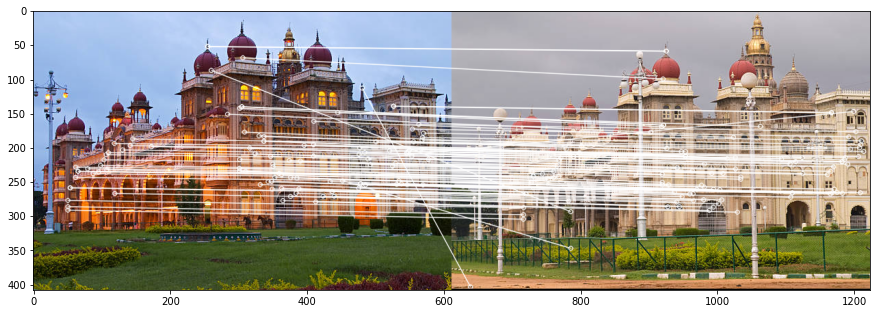

This image is in the location ./results/mysore1mysore2.jpg


In [14]:
firstImage = 38
secondImage = 39
result = results(firstImage,secondImage)
filepath = "./results/" + str(imgList[firstImage].split('.')[0]) + str(imgList[secondImage].split('.')[0]) +".jpg"
print("This image is in the location "+ filepath)
plt.imsave(filepath,result)